# 팀 비교 => 
- 1. TimeSeries 데이터는 LinePlot으로 변경시키기
- 2. 가장비싼 5개 판매가격 = > 변동이 가장 심한 날/판매점/구
- 3. 판매량이 가장 많은 일/월

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
if platform.system()=='Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path='c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family= font_name)
else:
    print('uknown')

# Data정의
- 2019년 상/하반기 주유소 판매데이터

## Columns
1. 지역 : 서울시 + <구>
2. 상호 : 주유소
3. 주소 : 주유소의 주소
4. 기간 : 판매날짜
5. 상표 : 주유소 브랜드 ('SK에너지'/'GS칼텍스' / 'S-OIL' /  '현대오일뱅크' / '알뜰주유소' / 'NH-OIL' / '알뜰(ex)' / '자가상표'
6. 셀프여부 : 셀프/served 주유방법
7. 고급휘발유,휘발유,경유,실내등유 : 판매중인 기름의 가격, 0일시에는 판매되어지고 있지 않은 상품.
 

In [2]:
fq = pd.read_csv('../PJT/data/2019년 상반기 주유소 판매가격.csv',encoding='cp949')
sq = pd.read_csv('../PJT/data/2019년 하반기 주유소 판매가격.csv',encoding='cp949')

In [3]:
fq.head(1)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0


In [4]:
sq.head(1)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190701,SK에너지,셀프,1777,1577,1477,0


In [5]:
fq.isnull().sum()

번호       0
지역       0
상호       0
주소       0
기간       0
상표       0
셀프여부     0
고급휘발유    0
휘발유      0
경유       0
실내등유     0
dtype: int64

In [6]:
sq.isnull().sum()

번호       0
지역       0
상호       0
주소       0
기간       0
상표       0
셀프여부     0
고급휘발유    0
휘발유      0
경유       0
실내등유     0
dtype: int64

In [7]:
df = pd.concat([fq,sq])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181714 entries, 0 to 91123
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   번호      181714 non-null  object
 1   지역      181714 non-null  object
 2   상호      181714 non-null  object
 3   주소      181714 non-null  object
 4   기간      181714 non-null  int64 
 5   상표      181714 non-null  object
 6   셀프여부    181714 non-null  object
 7   고급휘발유   181714 non-null  int64 
 8   휘발유     181714 non-null  int64 
 9   경유      181714 non-null  int64 
 10  실내등유    181714 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 16.6+ MB


In [9]:
df.columns

Index(['번호', '지역', '상호', '주소', '기간', '상표', '셀프여부', '고급휘발유', '휘발유', '경유',
       '실내등유'],
      dtype='object')

In [10]:
df['상표'].unique()

array(['SK에너지', 'GS칼텍스', 'S-OIL', '현대오일뱅크', '알뜰주유소', 'NH-OIL', '알뜰(ex)',
       '자가상표'], dtype=object)

In [11]:
df['지역'].unique()

array(['서울 강남구', '서울 강동구', '서울 강북구', '서울 강서구', '서울 관악구', '서울 광진구',
       '서울 구로구', '서울 금천구', '서울 노원구', '서울 도봉구', '서울 동대문구', '서울 동작구',
       '서울 마포구', '서울 서대문구', '서울 서초구', '서울 성동구', '서울 성북구', '서울 송파구',
       '서울 양천구', '서울 영등포구', '서울 용산구', '서울 은평구', '서울 종로구', '서울 중구',
       '서울 중랑구'], dtype=object)

In [12]:
df.head(1)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0


In [13]:
df['시'],df['구'] ='서울특별시', df['지역'].apply(lambda x: x.split(' ')[1])

In [14]:
df.head(1)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구


In [15]:
from datetime import datetime
df['기간'] = df['기간'].apply(lambda x:datetime.strptime(str(x), "%Y%m%d"))
df['년'],df['월'],df['일'],df['요일'] =  df['기간'].dt.year, df['기간'].dt.month, df['기간'].dt.day, df['기간'].dt.day_name()

In [16]:
df.head(1)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구,년,월,일,요일
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-01,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,1,Tuesday


In [17]:
df.sort_values('휘발유',ascending=False)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구,년,월,일,요일
86620,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-24,SK에너지,일반,2649,2356,2196,0,서울특별시,중구,2019,9,24,Tuesday
86626,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-30,SK에너지,일반,2699,2356,2196,0,서울특별시,중구,2019,9,30,Monday
86627,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-10-01,SK에너지,일반,2699,2356,2196,0,서울특별시,중구,2019,10,1,Tuesday
86621,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-25,SK에너지,일반,2649,2356,2196,0,서울특별시,중구,2019,9,25,Wednesday
86622,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-26,SK에너지,일반,2699,2356,2196,0,서울특별시,중구,2019,9,26,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18816,A0000526,서울 강서구,화곡현대주유소,서울 강서구 강서로 151 (화곡동),2019-04-14,SK에너지,셀프,1757,0,0,0,서울특별시,강서구,2019,4,14,Sunday
79244,A0000230,서울 용산구,강변주유소,서울 용산구 원효로 9 (청암동),2019-02-11,SK에너지,일반,0,0,1495,0,서울특별시,용산구,2019,2,11,Monday
79243,A0000230,서울 용산구,강변주유소,서울 용산구 원효로 9 (청암동),2019-02-10,SK에너지,일반,0,0,1495,0,서울특별시,용산구,2019,2,10,Sunday
79242,A0000230,서울 용산구,강변주유소,서울 용산구 원효로 9 (청암동),2019-02-09,SK에너지,일반,0,0,1495,0,서울특별시,용산구,2019,2,9,Saturday


In [18]:
df[df['휘발유']!=0].sort_values('휘발유')

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구,년,월,일,요일
13148,A0033328,서울 강서구,KH에너지(주)직영 KH외발산주유소,서울 강서구 방화대로 30,2019-02-07,SK에너지,셀프,1788,1255,1155,0,서울특별시,강서구,2019,2,7,Thursday
82475,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-01-31,SK에너지,일반,0,1260,1160,0,서울특별시,은평구,2019,1,31,Thursday
82474,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-01-30,SK에너지,일반,0,1260,1160,0,서울특별시,은평구,2019,1,30,Wednesday
82476,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-02-01,SK에너지,일반,0,1260,1160,0,서울특별시,은평구,2019,2,1,Friday
82998,A0000690,서울 은평구,지에스칼텍스(주)수색뉴타운주유소,서울 은평구 수색로 350 (수색동),2019-01-26,GS칼텍스,셀프,0,1265,1165,0,서울특별시,은평구,2019,1,26,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86623,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-27,SK에너지,일반,2699,2356,2196,0,서울특별시,중구,2019,9,27,Friday
86622,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-26,SK에너지,일반,2699,2356,2196,0,서울특별시,중구,2019,9,26,Thursday
86620,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-24,SK에너지,일반,2649,2356,2196,0,서울특별시,중구,2019,9,24,Tuesday
86626,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-30,SK에너지,일반,2699,2356,2196,0,서울특별시,중구,2019,9,30,Monday


In [19]:
df.groupby('상표').mean()[['휘발유']]

,휘발유
상표,
GS칼텍스,1564.029014
NH-OIL,1449.088889
S-OIL,1532.302882
SK에너지,1612.147153
알뜰(ex),1431.347945
알뜰주유소,1447.875902
자가상표,1492.085540
현대오일뱅크,1515.458244


[(1400, 1625)]

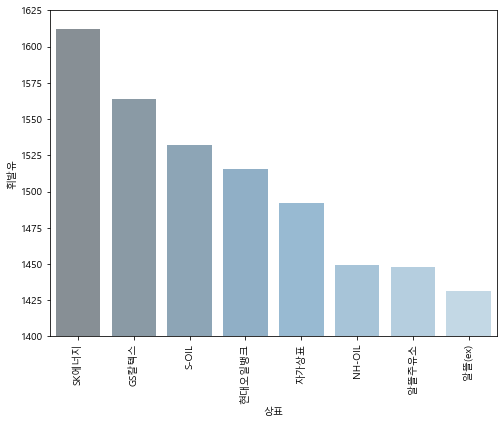

In [20]:
import seaborn as sns
plt.figure(figsize=(8,6))
plt.xticks(rotation=90)
gasByBrand = df.groupby('상표').mean()[['휘발유']].sort_values('휘발유',ascending=False).reset_index()
gasByBrandPlot = sns.barplot(gasByBrand['상표'],gasByBrand['휘발유'],palette='Blues_d',alpha=0.6)
gasByBrandPlot.set(ylim=(1400,1625))

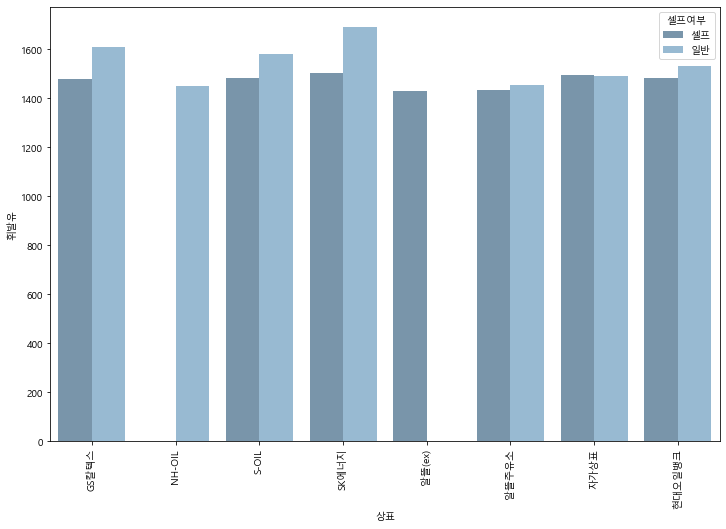

In [21]:
import seaborn as sns
import matplotlib.pyplot as plot
plot.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.barplot(x='상표',y='휘발유',hue='셀프여부',data=df.groupby(['상표','셀프여부']).mean()[['휘발유']].reset_index(), palette='Blues_d',alpha=0.7)

In [22]:
df.head(1)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구,년,월,일,요일
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-01,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,1,Tuesday


In [23]:
df.shape

(181714, 17)

In [24]:
df[df['휘발유']!=0].shape

(181670, 17)

## Count & Process >> Outliers

<Figure size 576x360 with 0 Axes>

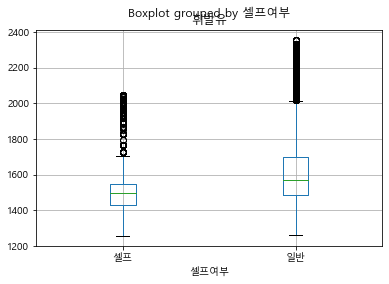

In [25]:
plt.figure(figsize=(8,5))
df[df['휘발유']!=0].boxplot(column='휘발유',by='셀프여부')
plt.show()

## Count & Process >> Outliers

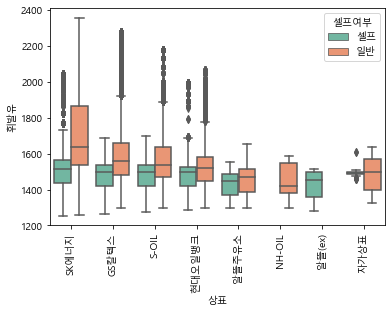

In [26]:
plt.xticks(rotation=90)
sns.boxplot(y='휘발유',x='상표',hue="셀프여부",data=df[df['휘발유']!=0],palette="Set2")
plt.show()

## df['휘발유']!=0
휘발유값이 0인곳은 판매를 안하는 곳이므로 invalid한 entry다 </br> 그래서 제외하고 값을 구하기로

In [27]:
df.shape

(181714, 17)

In [28]:
df[df['휘발유']!=0].groupby('구')[['휘발유']].mean()

,휘발유
구,
강남구,1713.328332
강동구,1577.487784
강북구,1454.131601
강서구,1489.173443
관악구,1518.635029
광진구,1490.597054
구로구,1525.410383
금천구,1477.121992
노원구,1531.221551


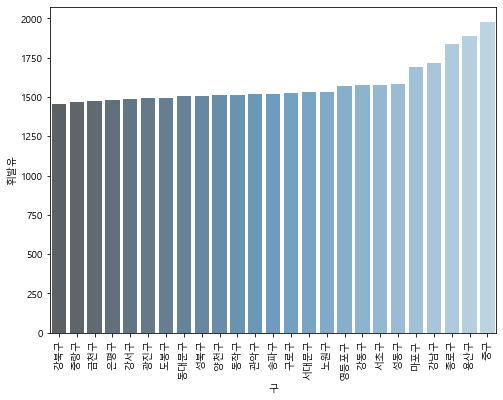

In [29]:
df1 = df[df['휘발유']!=0].groupby('구')[['휘발유']].mean().sort_values('휘발유').reset_index()
plt.figure(figsize=(8,6))
plt.xticks(rotation=90)
sns.barplot(df1['구'],df1['휘발유'],palette='Blues_d',alpha=0.8)

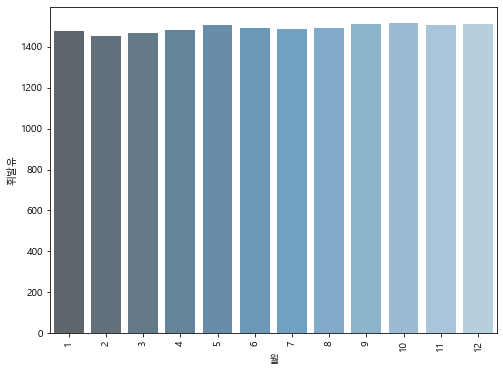

In [30]:
df2 = df[df['휘발유']!=0].groupby('월')[['휘발유']].mean().sort_values('휘발유').reset_index()
plt.figure(figsize=(8,6))
plt.xticks(rotation=90)
sns.barplot(df2['월'],df1['휘발유'],palette='Blues_d',alpha=0.8)

## 미판매 상품의 비중을 확인.

- if...... 판매가가 0인 상품/주유소의 갯수를 체크하기 1퍼센터 이하면 delete
- else.... 1퍼센트 이상이면 normalize할 방법을 간구하기

### Normalization 표준화 방법

- 평균값으로 채우기
- 지우기
- NearestNeighbor ::: 위치를 조회하여 같은 동네/해당 상품이 판매되어지는 가장 가까운 주유소와 동일하게 가격 메기기

In [31]:
columns = ['고급휘발유', '휘발유', '경유','실내등유']
for column in columns:
    count = df[df[column]==0].shape[0]
    dfCount = df['휘발유'].shape[0]
    weight = round((count/dfCount)*100,2)
    print(f'{column}의 값이 0인, 즉 판매를 하지 않는 주유소의 비중은 {weight}%입니다.')

고급휘발유의 값이 0인, 즉 판매를 하지 않는 주유소의 비중은 59.57%입니다.
휘발유의 값이 0인, 즉 판매를 하지 않는 주유소의 비중은 0.02%입니다.
경유의 값이 0인, 즉 판매를 하지 않는 주유소의 비중은 0.02%입니다.
실내등유의 값이 0인, 즉 판매를 하지 않는 주유소의 비중은 60.84%입니다.


# 아래의 heatMap은 의미하는것이 뚜렷하지 않다.
### Data Analysis Idea
- 1. 각 구별 월별 normalize해서 구/월을 데이터를 맞추기
- 요일별 판매량을 구별로 구하여 출퇴근/직장인 수요를 찾아내기

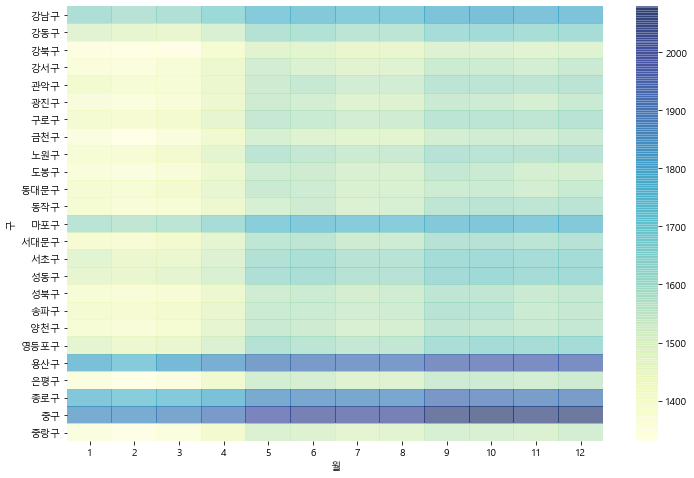

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(round(df.pivot_table(values='휘발유',index='구',columns='월')),cmap="YlGnBu",alpha=0.6)